# Predict Home Prices using Regression Techniques

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') #this would remove any deprecated warning

## Load Train and Test Data

In [2]:
#Import the train & test data
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
print("Train Data: " + str(df_train.shape))
print("Test Data: " + str(df_test.shape))

Train Data: (1460, 81)
Test Data: (1459, 80)


## Analyze Data

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
df_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


## Analyze SalePrice

In [8]:
#Lets look at sale price
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

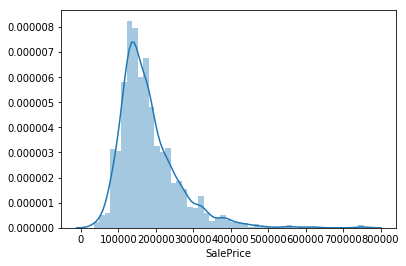

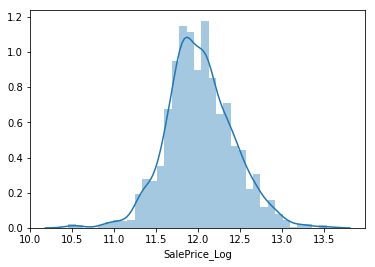

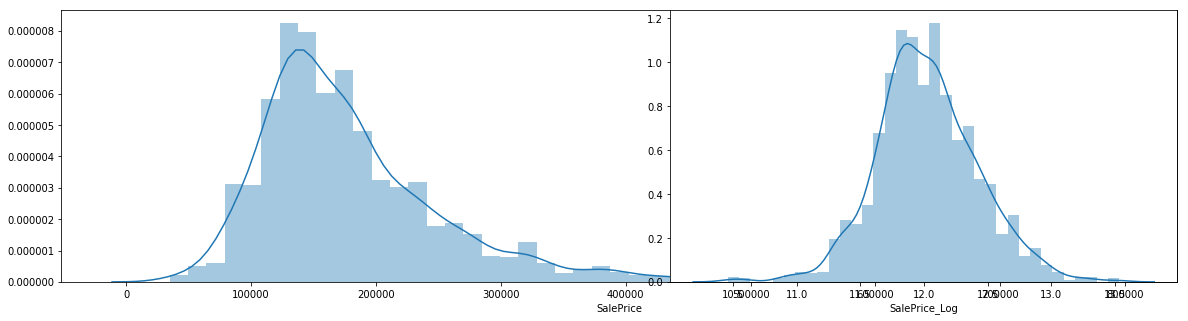

In [9]:
#Look at sale price in a distrbution graph
sns.distplot(df_train['SalePrice'])
plt.show()

#Calculated the Log of SalePrice and store it in DF
df_train['SalePrice_Log'] = np.log(df_train['SalePrice'])
sns.distplot(df_train['SalePrice_Log'])
plt.show()

#Charting them side by side
fig = plt.figure(figsize=[20,5])
ax1 = fig.add_subplot(1, 1, 1)
sns.distplot(df_train['SalePrice'], ax=ax1)

ax2 = fig.add_subplot(1, 2, 2)
sns.distplot(df_train['SalePrice_Log'], ax=ax2)
plt.show()


#QUESTION: Do you need to apply np.log to every numerical variable?

### Check Skewness and Kurtosis of SalePrice & SalePrice_Log

In [10]:
#Check to see if the SalePrice deviates from a normal distribution
#Skew - how much does it skew away from a normal distribution
#Kurtosis - how much more peak/taller it is from a normal distribution

s = df_train['SalePrice'].skew()
print("Non-Log Skewness: " + str(s))
k = df_train['SalePrice'].kurt()
print("Non-Log Kurtosis: " + str(k))
print("*" * 50)

print("Log Skewness: %f" % df_train['SalePrice_Log'].skew())
print("Log Kurtosis: %f" % df_train['SalePrice_Log'].kurt())

#QUESTION: What’s the purpose of testing skewness and kurtosis?

Non-Log Skewness: 1.8828757597682129
Non-Log Kurtosis: 6.536281860064529
**************************************************
Log Skewness: 0.121335
Log Kurtosis: 0.809532


## What's the Relationship Between SalePrice and some Numerical Variables

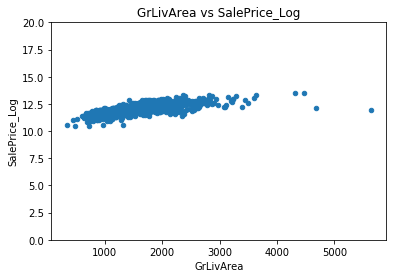

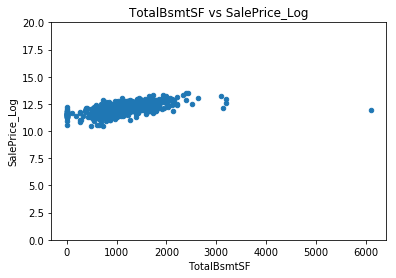

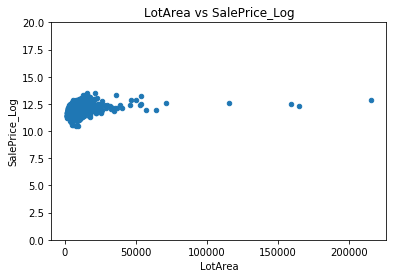

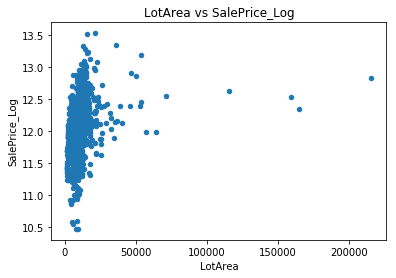

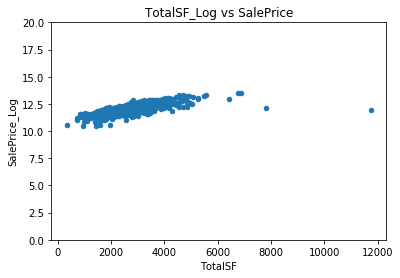

In [11]:
#GrLivArea, talBsmtSF have no missing values
#Select only GrLivArea & SalePrice and draw a scatter plot
df_train[['SalePrice_Log', 'GrLivArea']].plot.scatter(x='GrLivArea', y='SalePrice_Log', ylim=(0, 20), title='GrLivArea vs SalePrice_Log')

#Select only TotalBsmtSF & SalePrice and draw a scatter plot
df_train[['SalePrice_Log', 'TotalBsmtSF']].plot.scatter(x='TotalBsmtSF', y='SalePrice_Log', ylim=(0, 20), title='TotalBsmtSF vs SalePrice_Log')

#Select only LotArea & SalePrice and draw a scatter plot
df_train[['SalePrice_Log', 'LotArea']].plot.scatter(x='LotArea', y='SalePrice_Log', ylim=(0, 20), title='LotArea vs SalePrice_Log')

#QUESTION: Another syntax to plot. DIFF FROM ABOVE
df_train.plot(kind='scatter', x='LotArea', y='SalePrice_Log')
plt.title('LotArea vs SalePrice_Log')


#Get Total Square Footage then plot against SalePrice
df_train['TotalSF'] = df_train['GrLivArea'] + df_train['TotalBsmtSF']
df_train[['SalePrice_Log', 'TotalSF']].plot.scatter(x='TotalSF', y='SalePrice_Log', ylim=(0, 20), title='TotalSF_Log vs SalePrice')

plt.show()


### Conclusion
- GrLivArea & TotalBsmtSF seems to have a linear correlation to SalePrice
- Lot Area does not seem to have a liner correlation to SalePrice

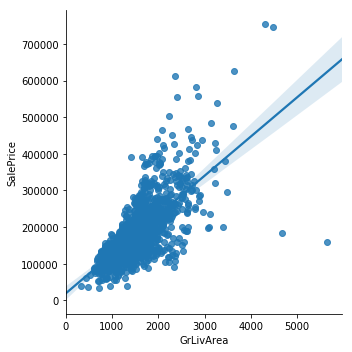

In [12]:
#Use seaborn to plot the same charts above. 
#QUESTION: Which is better?
#QUESTION: Why scatterplot doesn't work in seaborn - https://seaborn.pydata.org/generated/seaborn.scatterplot.html

#Used SalePrice and not SalePrice_Log
sns.lmplot(x='GrLivArea', y='SalePrice', data=df_train)
#sns.scatterplot(x='GrLivArea', y='SalePrice', data=df_train)
plt.show()

### Using Subplots to Display the Charts

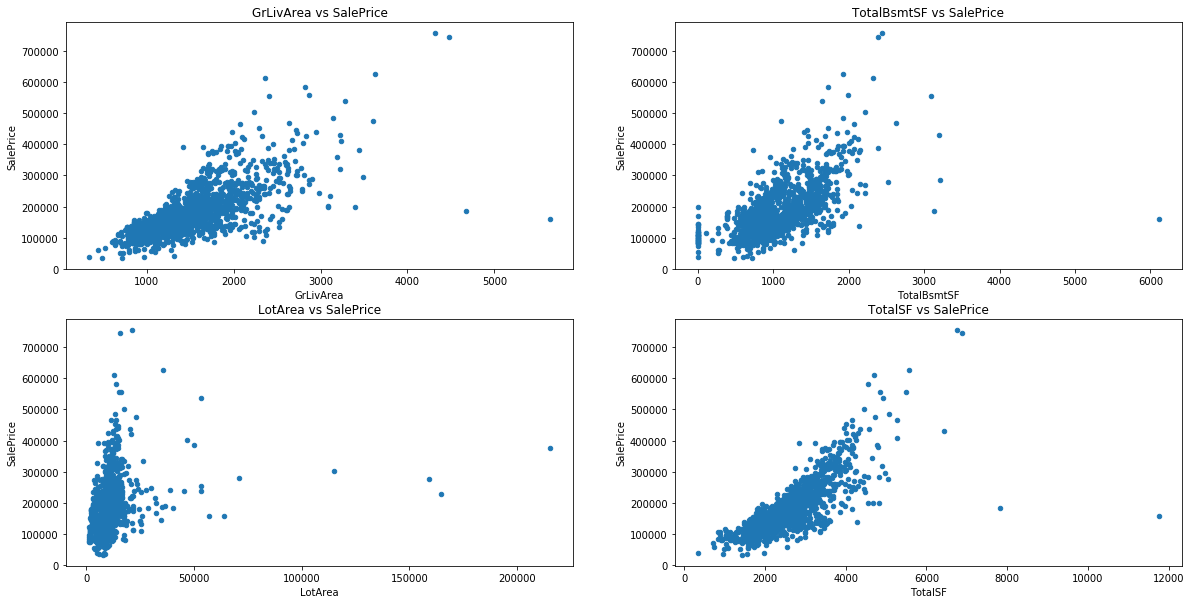

In [15]:
area = df_train[['SalePrice', 'GrLivArea', 'TotalBsmtSF', 'LotArea', 'TotalSF']]

#Set the size of the entire plot
fig = plt.figure(figsize=[20,10])

#What to plot in each subplot
#QUESTION - How to read this (2, 2, 1) - 2 rows, 2 columns, box 1
ax1 = fig.add_subplot(2, 2, 1)
area.plot.scatter(x='GrLivArea', y='SalePrice', ax=ax1, title='GrLivArea vs SalePrice')

ax2 = fig.add_subplot(2, 2, 2)
area.plot.scatter(x='TotalBsmtSF', y='SalePrice', ax=ax2, title='TotalBsmtSF vs SalePrice')

ax3 = fig.add_subplot(2, 2, 3)
area.plot.scatter(x='LotArea', y='SalePrice', ax=ax3, title='LotArea vs SalePrice')

ax4 = fig.add_subplot(2, 2, 4)
area.plot.scatter(x='TotalSF', y='SalePrice', ax=ax4, title='TotalSF vs SalePrice')

plt.show()

### Use Correlation Matrix to Easily Find Out the Relationship Between All The Numerical Variables

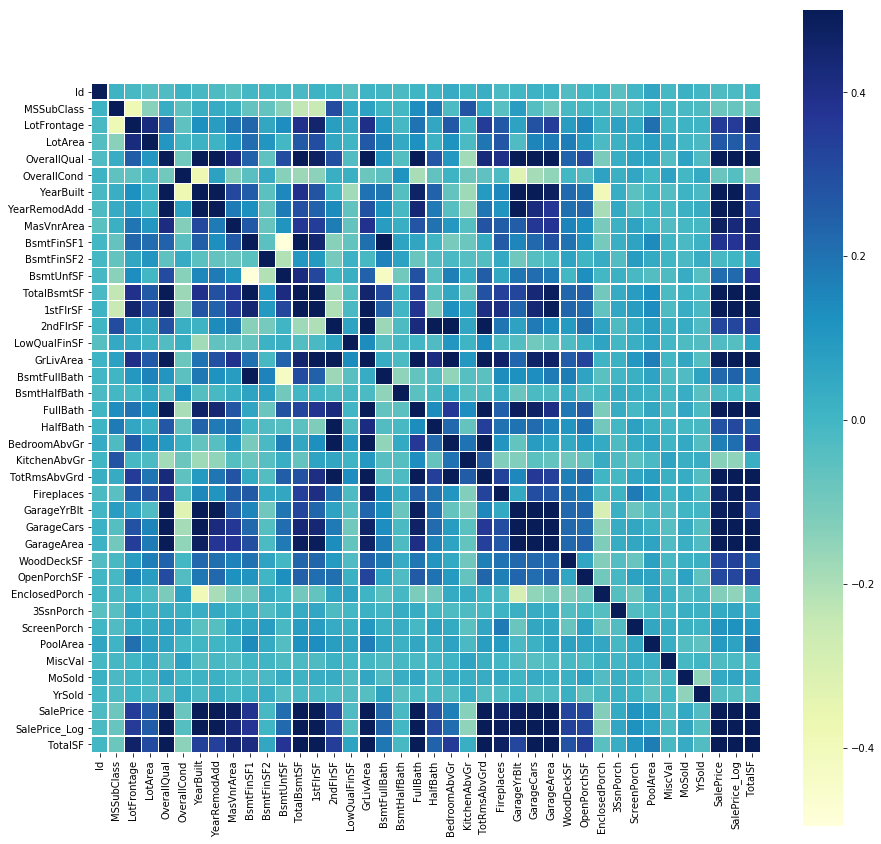

In [16]:
corr_matrix = df_train.corr()
plt.figure(figsize=(15,15)) #this sets the size of the heatmap
sns.heatmap(corr_matrix, linewidths=0.2, square=True, vmax = 0.5, cmap="YlGnBu")
plt.show()

In [17]:
#Method 1 to get the top 10 correlated variables that are related to SalePrice, not counting SalePrice
k = 11
cols = corr_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
cols

Index(['SalePrice', 'SalePrice_Log', 'OverallQual', 'TotalSF', 'GrLivArea',
       'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath',
       'TotRmsAbvGrd'],
      dtype='object')

In [18]:
#Method 2 to get the top 10 correlated variables that are related to SalePrice, not including SalePrice
corr_to_saleprice = df_train[df_train.columns[1:]].corr()['SalePrice']
corr_to_saleprice = corr_to_saleprice.sort_values(ascending=False).iloc[:11] #get the top 10 correlated variables not counting SalePrice
corr_to_saleprice.index

#Question: Method 1 vs Method 2, which is better?

Index(['SalePrice', 'SalePrice_Log', 'OverallQual', 'TotalSF', 'GrLivArea',
       'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath',
       'TotRmsAbvGrd'],
      dtype='object')

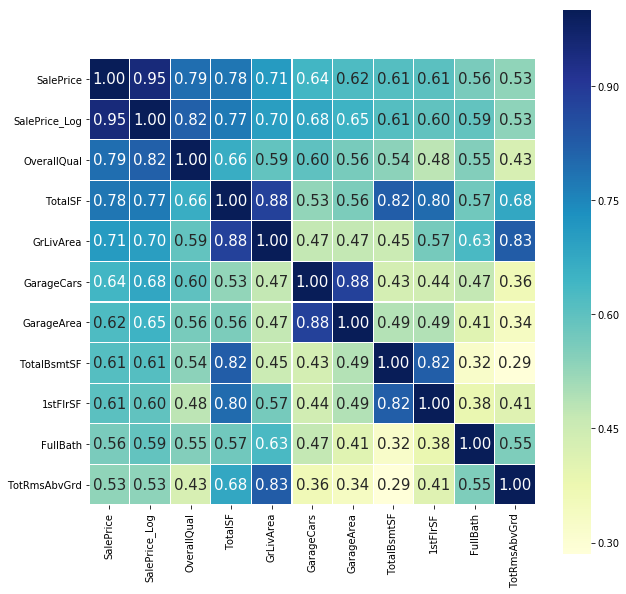

In [19]:
#Corrcoef - https://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html
#In order to use corrcoef, each row needs to be a variable and each column is a single observation. Hence we need to transpose the data set.

top10_corr_matrix = np.corrcoef(df_train[cols].values.transpose()) #df_train[cols].values.transpose() moves the variable names to each row instead of column
plt.figure(figsize=(10,10)) #this sets the size of the heatmap

#fmt = decimal places
# annot_kws={'size': 10} - controls the size of font each square
sns.heatmap(top10_corr_matrix, linewidths=0.2, square=True, cmap="YlGnBu", cbar=True, annot=True, yticklabels=cols.values, xticklabels=cols.values, fmt='.2f', annot_kws={'size': 15})
plt.show()

### Conclusion: What are the highly correlated Numerical variables to SalePrice
* GarageCars and GarageArea are similar. Hence, we'll only include GarageCars since it has a higher correlation score to Saleprice
* The final list of highly correlated variables are - 'OverallQual', 'TotalSF', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'

## Seaborn PairPlot - Another Way to Visualize Correlation

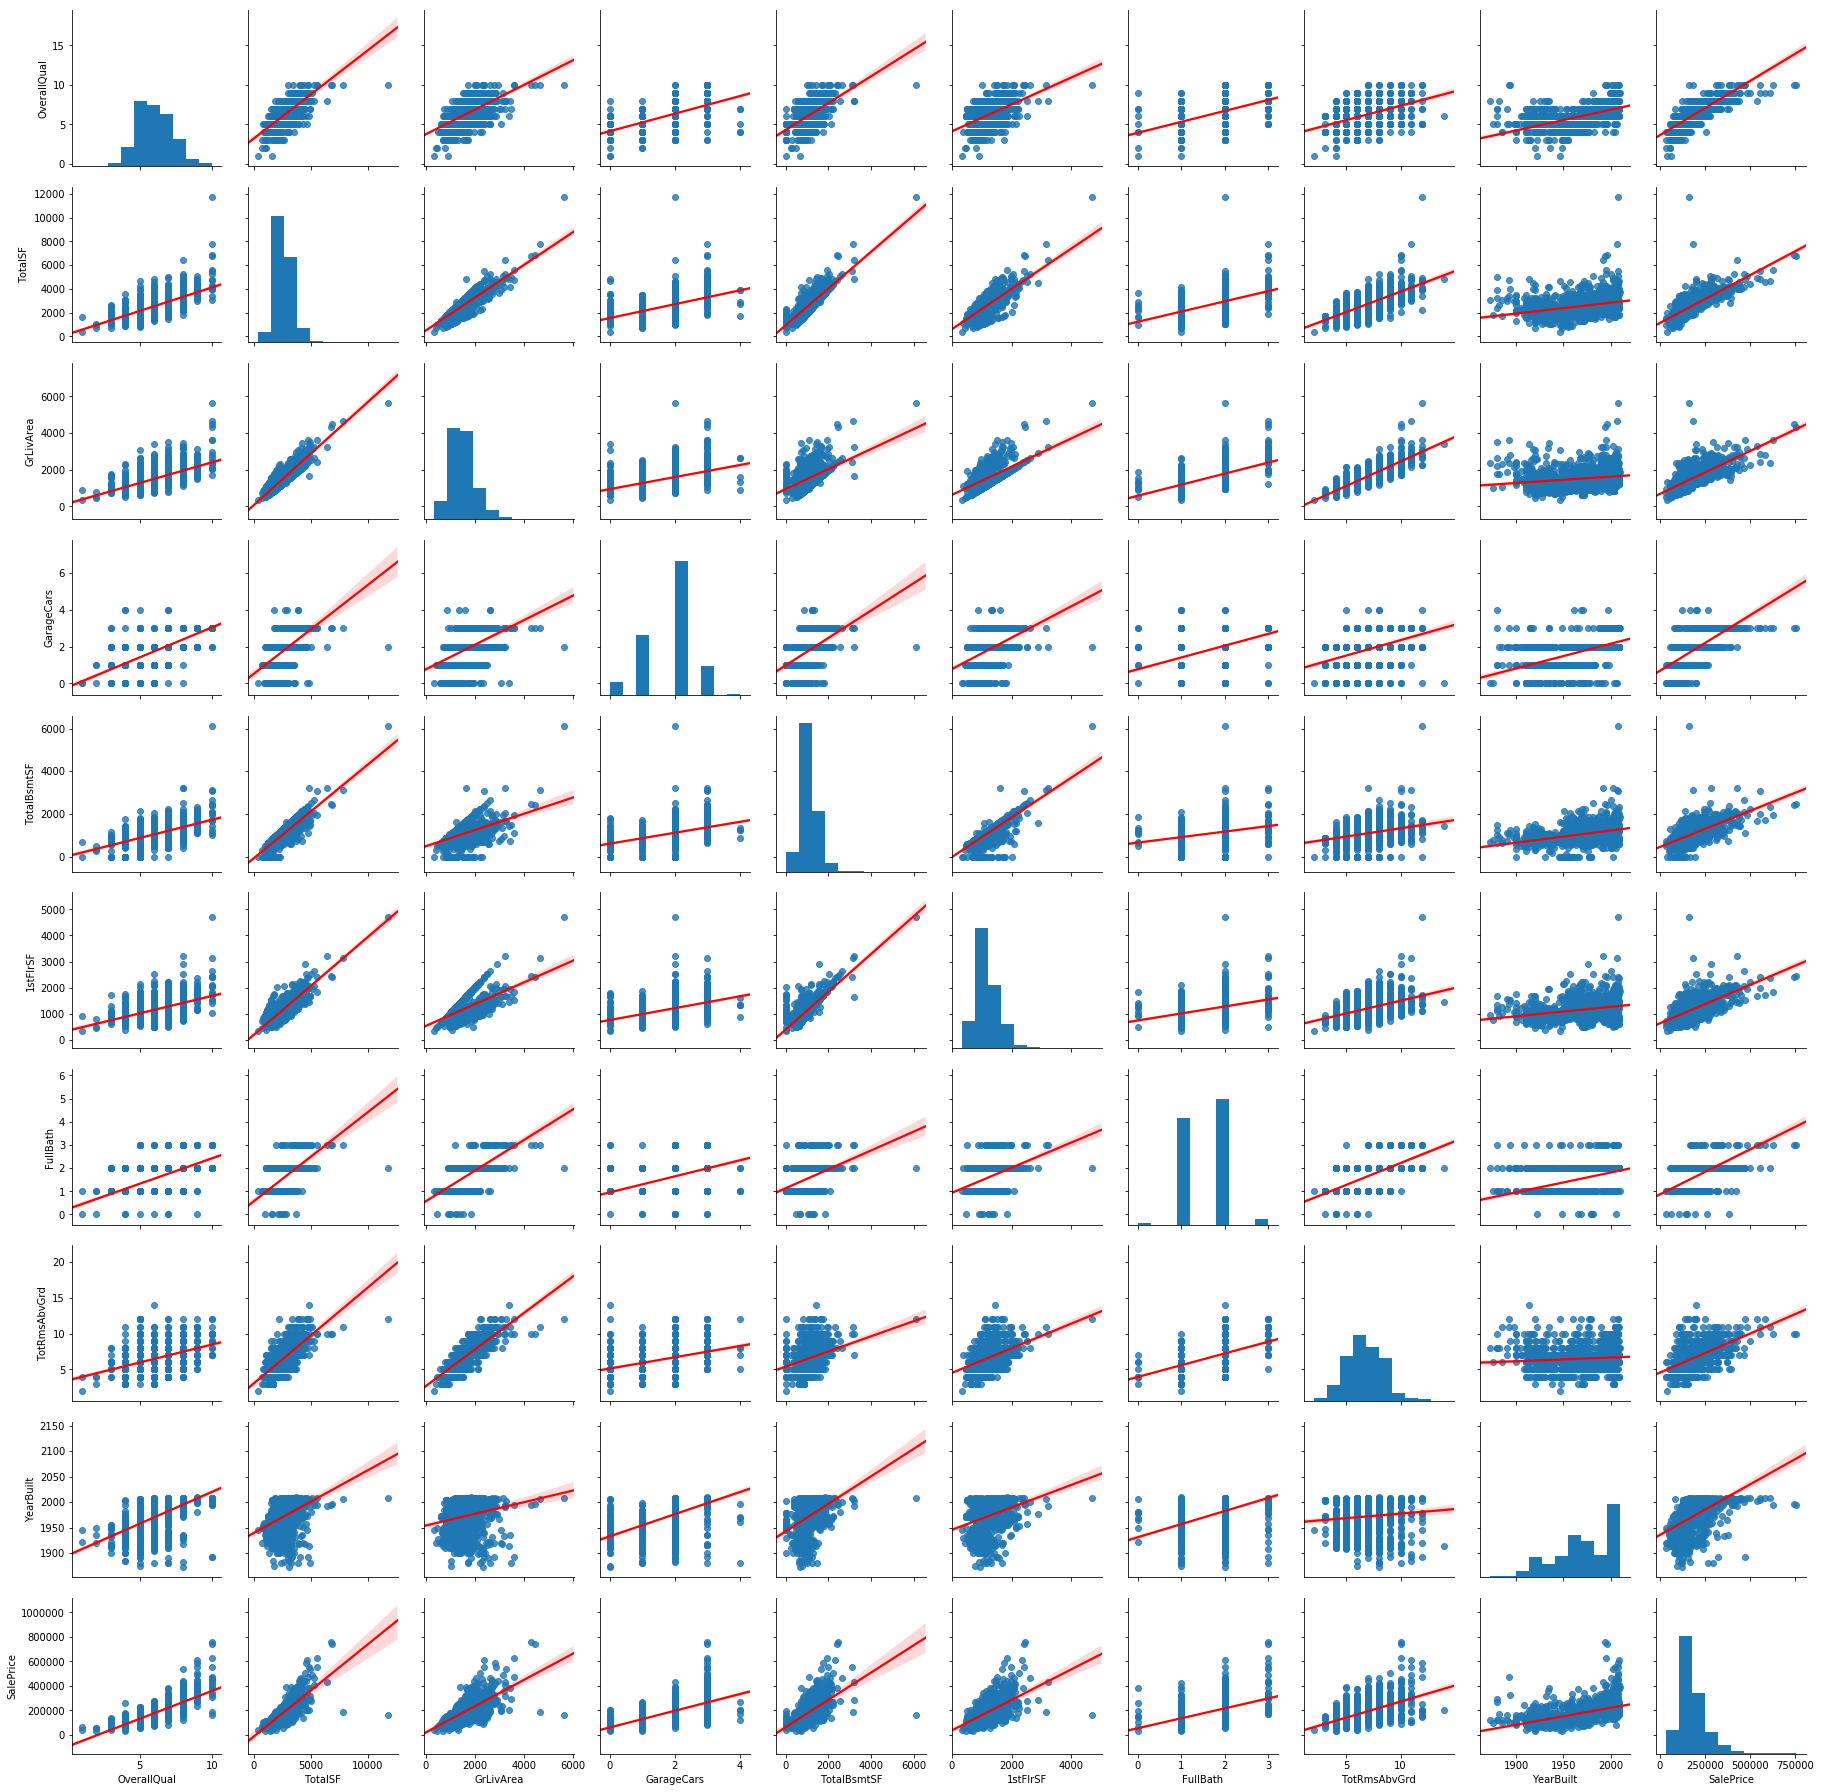

In [20]:
#Scatterplots between SalePrice and the top correlated variables
cols = ['OverallQual', 'TotalSF', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'SalePrice']
sns.pairplot(df_train[cols],kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.show()

#QUESTION: How to read these charts?
# Eg year built (y axis) has no correlation to Total SF (x axis)
# TotalBsmtSq is correlated to 1stFlrSF

## Numerical and Categorical Variables

In [21]:
#Seperate the variables to numerical and categorical

#QUESTION: Is this right to use np.number to identify numerical vs categorical variables?

numerical_variables = df_train.select_dtypes(include=[np.number]).columns
print("Number of numerical variables: ", len(numerical_variables))

categorical_variables = df_train.select_dtypes(exclude=[np.number]).columns
print("Number of categorical variables: ", len(categorical_variables))

print("Total numeber of variables: ", len(df_train.columns))

Number of numerical variables:  40
Number of categorical variables:  43
Total numeber of variables:  83


In [22]:
df_train[numerical_variables].head(5)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,SalePrice_Log,TotalSF
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,0,2,2008,208500,12.247694,2566
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,0,5,2007,181500,12.109011,2524
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,0,9,2008,223500,12.317167,2706
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,272,0,0,0,0,2,2006,140000,11.849398,2473
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,0,12,2008,250000,12.429216,3343


In [23]:
df_train[categorical_variables].head(5)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


### Use Boxplots to Visualize Correlations Between SalePrice and Categorial Variables

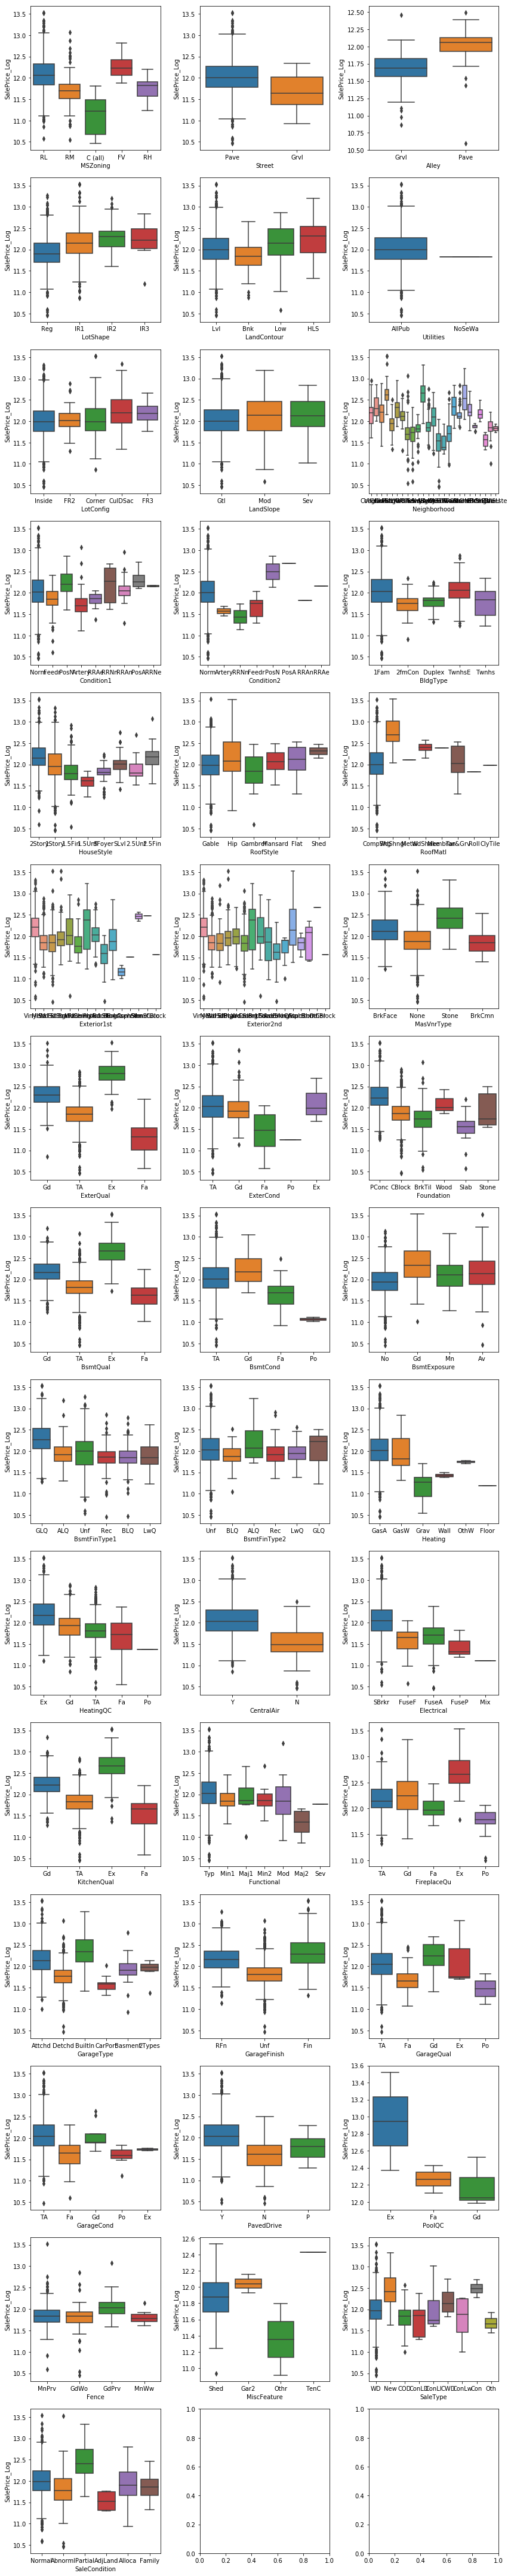

In [24]:
list_categorial_variables = list(categorical_variables)

rows = 15
cols = 3

fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4))
i = 0

for r in range(0, rows):
    for c in range(0, cols):
        if i < len(categorical_variables):
            sns.boxplot(x=categorical_variables[i], y='SalePrice_Log', data=df_train, ax= axs[r][c])
            i = i + 1

plt.tight_layout() #spreads each of the charts to use up all the assigned space
plt.show()

## Conclustion: Categorial Variables
* The ones that have strong correlation to sale price log are - 'MSZoning', 'Neighborhood', 'Condition2', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'BsmtQual', 'BsmtCond', 'Heating', 'CentralAir', 'KitchenQual', 'GarageType', 'GarageQual', 'PoolQC', 'MiscFeature', 'SaleType'

**Question**: I identified correlation based on looking at the difference in median prices in each box. Not scientic, used eyeballing method. Any other better method?

In [25]:
print(categorical_variables)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


## Cleaning Missing Data
* Fill in missing values for highly correlated numerical and categorical variables

In [26]:
#Check which variables have missing values

high_corr_categorical_variables = ['MSZoning', 'Neighborhood', 'Condition2', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'BsmtQual', 'BsmtCond', 'Heating', 'CentralAir', 'KitchenQual', 'GarageType', 'GarageQual', 'PoolQC', 'MiscFeature', 'SaleType']
high_corr_numerical_variables = ['OverallQual', 'TotalSF', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']

all_high_corr_variables = high_corr_categorical_variables + high_corr_numerical_variables


#Create a new dataframe with only highly correlated variables
df_high_corr_variables = df_train[all_high_corr_variables]

total_null_values = df_high_corr_variables.isnull().sum().sort_values(ascending=False)
percent_null_values = (df_high_corr_variables.isnull().sum() / df_high_corr_variables.isnull().count()).sort_values(ascending=False)
df_missing_data = pd.concat([total_null_values, percent_null_values], axis=1, keys=['Total', 'Percent'])
df_missing_data #this is a series

#QUESTION
# these variables are not missing, it has NA as values in them. Why isnull counting NA?
# df_missing_data is a series, I thought it's a dataframe

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
GarageType,81,0.055479
GarageQual,81,0.055479
BsmtQual,37,0.025342
BsmtCond,37,0.025342
CentralAir,0,0.000000
Neighborhood,0,0.000000
Condition2,0,0.000000
RoofMatl,0,0.000000


In [27]:
#All the variables with missing values are categorical.
#For each of the categorical variable with missing values, fill it with None

for i in range(0, len(df_missing_data)):
    if df_missing_data.loc[df_missing_data.index[i]]['Total'] > 0:
        print(df_missing_data.index[i])
        df_high_corr_variables[df_missing_data.index[i]] = df_high_corr_variables[df_missing_data.index[i]].fillna("None")
        


PoolQC
MiscFeature
GarageType
GarageQual
BsmtQual
BsmtCond


In [28]:
#Double check to see there's no more null values
df_high_corr_variables.isnull().sum()

MSZoning        0
Neighborhood    0
Condition2      0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
ExterQual       0
BsmtQual        0
BsmtCond        0
Heating         0
CentralAir      0
KitchenQual     0
GarageType      0
GarageQual      0
PoolQC          0
MiscFeature     0
SaleType        0
OverallQual     0
TotalSF         0
GrLivArea       0
GarageCars      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
dtype: int64